# **1. Equacions diferencials**



**$\delta$ de Dirac**

Es pot entendre la delta de Dirac com el límit d'una successió de funcions, de les quals són exemple:

$ \lim_{\varepsilon\rightarrow 0^+}
\frac{sin(x/\varepsilon)}{\pi x}$


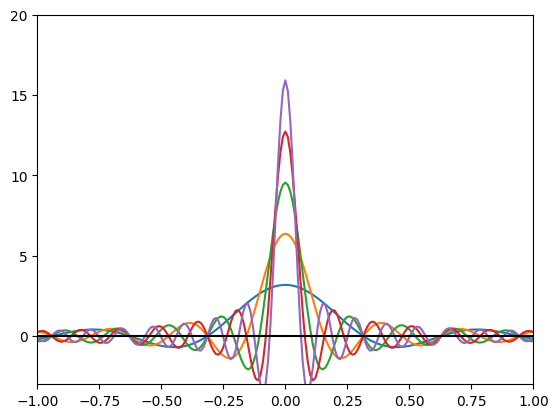

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

min = -1.0
max = 1.0
step = 0.01

for n in range(10,60,10):
    x = np.arange(min,max+step,step)
    y = np.sin(n*x)/np.pi/x
    plt.plot(x, y)

plt.axhline(y=0, color='black', linestyle='-')
plt.xlim(-1.0,1.0)
plt.ylim(-3.0,20.0)
plt.show()


 $ \lim_{\varepsilon\rightarrow 0^+}
\frac{\varepsilon}{ \pi (x^{2}+\varepsilon^{2})} $


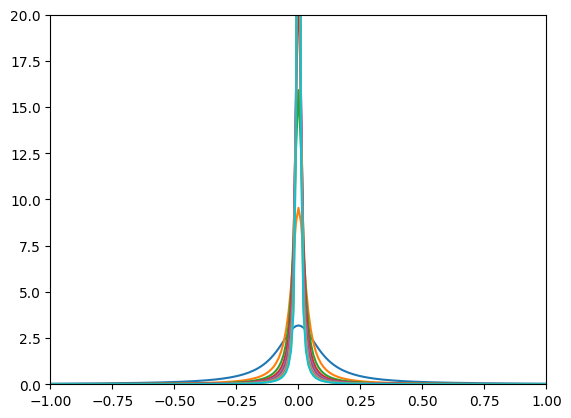

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

min = -1.0
max = 1.0
step = 0.01

for n in range(10,200,20):
    x = np.arange(min,max+step,step)
    y = 1.0/n/np.pi/(x*x+1.0/n/n)
    plt.plot(x, y)

plt.xlim(-1.0,1.0)
plt.ylim(0.0,20.0)
plt.show()

$ \lim_{\varepsilon\rightarrow 0^+}
\frac{1}{\sqrt{ \pi \varepsilon}}e^{-x^{2}/\varepsilon}$

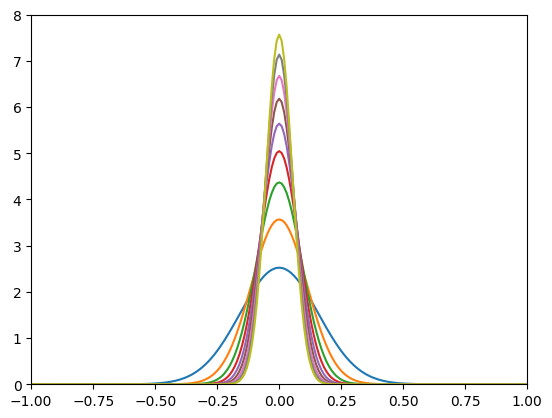

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

min = -1.0
max = 1.0
step = 0.01

for n in range(20,200,20):
    x = np.arange(min,max+step,step)
    y = np.sqrt(n/np.pi)*np.exp(-n*x*x)
    plt.plot(x, y)

plt.xlim(-1.0,1.0)
plt.ylim(0.0,8.0)
plt.show()


## **L'equació de difusió**

Per deduir l'equació de difusió unidimensional a partir d'un moviment aleatori (random walk) discret, considerem que tenim un conjunt de partícules que es poden moure en una xarxa unidimensional amb passos de longitud constant $ \Delta x $ i que els passos es fan a intervals de temps regulars $ \Delta t $. Denotem la probabilitat que una partícula es trobi en la posició $ x $ en el temps $ t $ com $ P(x, t) $.

En cada pas de temps, una partícula pot moure's a la dreta o a l'esquerra amb la mateixa probabilitat $ \frac{1}{2} $. La nova probabilitat $ P(x, t + \Delta t) $ estarà relacionada amb la probabilitat en el temps anterior a les posicions adjacents $ x + \Delta x $ i $ x - \Delta x $ de la següent manera:

$$ P(x, t + \Delta t) = \frac{1}{2}P(x - \Delta x, t) + \frac{1}{2}P(x + \Delta x, t) $$

Aquesta equació es pot reescriure com:

$$ P(x, t + \Delta t) - P(x, t) = \frac{1}{2} [P(x + \Delta x, t) + P(x - \Delta x, t) - 2P(x, t)] $$

Utilitzant l'expansió de Taylor al voltant de $ x $ i $ t $, tenim:

$$ P(x \pm \Delta x, t) \approx P(x, t) \pm (\Delta x) \frac{\partial P}{\partial x} + \frac{(\Delta x)^2}{2} \frac{\partial^2 P}{\partial x^2} $$

$$ P(x, t + \Delta t) \approx P(x, t) + (\Delta t) \frac{\partial P}{\partial t} $$

Substituint aquestes aproximacions a l'equació de diferència, obtenim:

$$ (\Delta t) \frac{\partial P}{\partial t} = \frac{(\Delta x)^2}{2} \frac{\partial^2 P}{\partial x^2} $$

En el límit quan $ \Delta x $ i $ \Delta t $ tendeixen a zero (però mantenint la relació $ \frac{(\Delta x)^2}{2\Delta t} $ constant), aquesta equació esdevé l'equació de difusió contínua:

$$ \frac{\partial P}{\partial t} = D \frac{\partial^2 P}{\partial x^2} $$

on el coeficient de difusió $ D $ és definit com:

$$ D = \lim_{\Delta x, \Delta t \to 0} \frac{(\Delta x)^2}{2\Delta t} $$

Aquest és el procés bàsic per deduir l'equació de difusió a partir d'un random walk unidimensional discret.


## Simulació i solució de l'equació

A continuació un codi que simula el moviment de un nombre gran de caminants aleatoris que comencen a la posició 0. Amb la barra desplaçament podeu anar veient com canvia la distribució dels caminants sobre la recta real amb el temps i també com va variant la solució de l'equació diferencial

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

# Parameters
num_walkers = 10000
num_steps = 200  # Number of steps in the simulation
D = 1 / 2  # Diffusion coefficient for l=1 and tau=1

# Simulate random walks
positions = np.zeros((num_steps, num_walkers))  # Record positions at each step
for t in range(1, num_steps):
    steps = np.random.choice([-1, 1], num_walkers)  # Each walker moves left or right
    positions[t] = positions[t-1] + steps

# Solution to the diffusion equation
def diffusion_solution(x, t, D):
    return (1 / np.sqrt(1 * np.pi * D * t)) * np.exp(-x**2 / (4 * D * t))

# Function to update the plot
def update_plot(step=1):  # Start from step=1 to avoid division by zero
    plt.figure(figsize=(8, 5))

    # Plot histogram of walkers
    plt.hist(positions[step], bins=np.linspace(-50, 50, 101), density=True, alpha=0.75, color='blue', label='Random Walkers')

    # Plot diffusion solution
    x_values = np.linspace(-50, 50, 400)
    plt.plot(x_values, diffusion_solution(x_values, step, D), color='red', label='Diffusion Equation Solution')

    plt.title(f'Random Walkers Distribution vs. Diffusion Equation at Step {step}')
    plt.xlabel('Position')
    plt.ylabel('Density')
    plt.xlim(-50, 50)
    plt.legend()
    plt.show()

# Create interactive widget
interactive_plot = interactive(update_plot, step=(1, num_steps-1))
output = interactive_plot.children[-1]
output.layout.height = '450px'
interactive_plot


interactive(children=(IntSlider(value=1, description='step', max=199, min=1), Output(layout=Layout(height='450…

# **3. Sèries de Fourier**

**Sèrie de Fourier per a l'ona de dent de serra tenint en compte un nombre creixent de termes en el desenvolupament**

Un codi curtet en Python que podeu executar fàcilment i podeu anar ampliant amb més termes en el desenvolupament

Text(0.5, 0.98, 'Partial sums for Fourier series of f(x)')

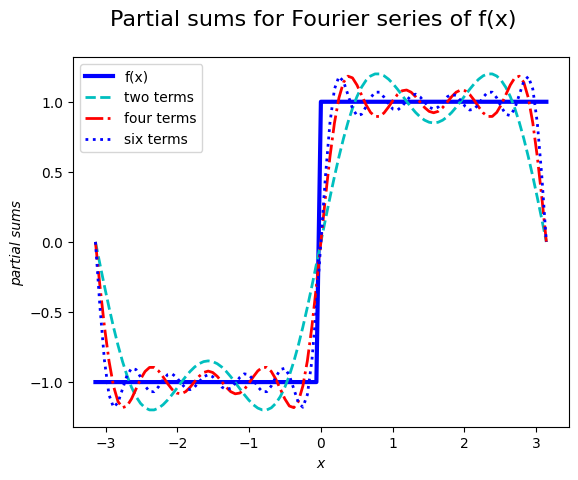

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x=np.linspace(-np.pi,np.pi,101)
f=np.ones_like(x)
f[x<0] = -1
#Correspon a una ona quadrada entre -pi i pi
y1 = (4/np.pi)*(np.sin(x) + np.sin(3*x)/3.0)
y2 = y1 + (4/np.pi)*(np.sin(5*x)/5.0 + np.sin(7*x)/7.0)
y3 = y2 + (4/np.pi)*(np.sin(9*x)/9.0 + np.sin(11*x)/11.0)
plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,f,'b-',lw=3,label='f(x)')
ax.plot(x,y1,'c--',lw=2,label='two terms')
ax.plot(x,y2,'r-.',lw=2,label='four terms')
ax.plot(x, y3,'b:',lw=2,label='six terms')
ax.legend(loc='best')
ax.set_xlabel('x',style='italic')
ax.set_ylabel('partial sums',style='italic')
fig.suptitle('Partial sums for Fourier series of f(x)',size=16)


Un codi en Python que genera una visualització on es pot anar augmentant el nombre de termes de forma interactiva.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
# Define the square wave function
def square_wave(x, n):
    s = 0
    for i in range(1, n+1):
        s += (1 / (2*i - 1)) * np.sin((2*i - 1) * x)
    return 4 / np.pi * s
# Create an interactive plot of the Fourier series
def plot_fourier_series(n):
    x = np.linspace(0, 2*np.pi, 1000)
    y = square_wave(x, n)
    plt.plot(x, y, label='Fourier series')
    plt.plot(x, np.sign(np.sin(x)), '--', label='Square wave')
    plt.legend()
    plt.ylim(-2, 2)
    plt.show()
# Create an integer slider widget for the number of terms in the Fourier series
n_slider = IntSlider(min=1, max=50, step=1, value=1)
# Create the interactive plot
interact(plot_fourier_series, n=n_slider)


interactive(children=(IntSlider(value=1, description='n', max=50, min=1), Output()), _dom_classes=('widget-int…

<function __main__.plot_fourier_series(n)>

Codi en Python i resultat de la sèrie de Fourier en cosinus de la funció $f(x) = \sin x$ en $[0,2\pi]$

Text(0.5, 0.98, 'Series de Fourier en cosinus de |sin(x)|')

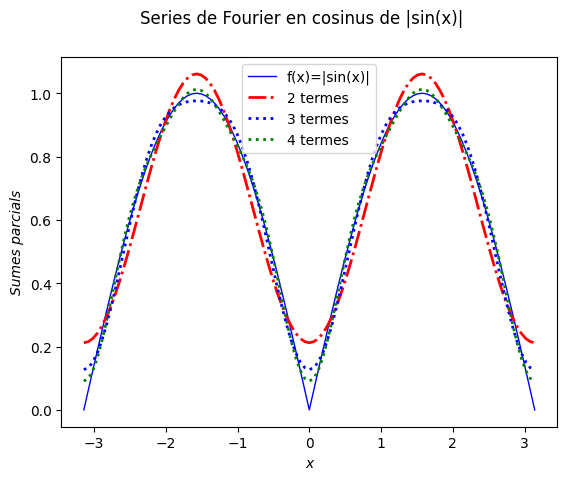

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x=np.linspace(-np.pi,np.pi,101)
y2 = 2.0/np.pi + 4.0/np.pi * (np.cos(2*x)/(1.0-2.0**2))
y4 = y2 + 4.0/np.pi * (np.cos(4*x)/(1.0-4.0**2))
y6 = y4 + 4.0/np.pi * (np.cos(6*x)/(1.0-6.0**2))
plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,np.absolute(np.sin(x)),'b-' ,lw=1,label='f(x)=|sin(x)|')
ax.plot(x,y2,'r-.',lw=2,label='2 termes' )
ax.plot(x,y4,'b:',lw=2,label='3 termes' )
ax.plot(x,y6,'g:',lw=2,label='4 termes' )
ax.legend(loc='best')
ax.set_xlabel( 'x' ,style= 'italic' )
ax.set_ylabel( 'Sumes parcials' ,style= 'italic' )
fig.suptitle('Series de Fourier en cosinus de |sin(x)|')

Solució de l’equació de difusió per a la temperatura en un anell.

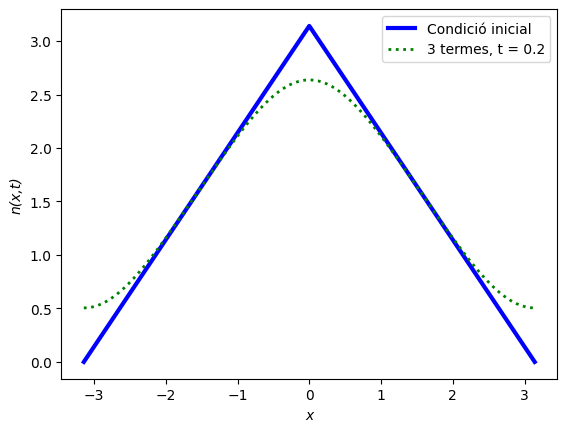

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Define the range of x values
x = np.linspace(-np.pi, np.pi, 101)

# Initialize time variable
t = 0.2

# Calculate y1, y3, and y5 for the given x range and time t
y1 = np.pi/2.0 + 1.0/np.pi * 4.0 * (np.cos(1*x)/(1.0**2)) * np.exp(- (1.0**2)*t)
y3 = y1 + 1.0/np.pi * 4.0 * (np.cos(3*x)/(3.0**2)) * np.exp(- (3.0**2)*t)
y5 = y3 + 1.0/np.pi * 4.0 * (np.cos(5*x)/(5.0**2)) * np.exp(- (5.0**2)*t)

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, np.pi-np.absolute(x),'b-',lw=3, label='Condició inicial')
ax.plot(x, y5, 'g:', lw=2, label='3 termes, t = {}'.format(t))

# Set legend location
ax.legend(loc='best')

# Set x and y labels with italic style
ax.set_xlabel('x', style='italic')
ax.set_ylabel('n(x,t)', style='italic')

# Show the plot
plt.show()


#**4. Transformades integrals**

Pas al continu de l’espectre de la funció pols quadrat. En el textguia prenem valors successius de T0/T1 = 2, 4, 8, 16, 32, mantenint T1 constant.

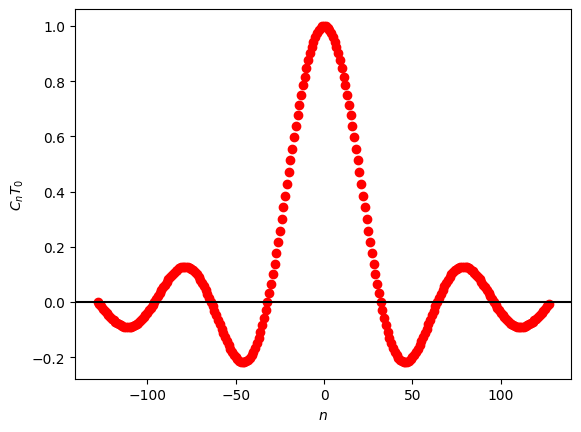

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
T0=32
min = -4*T0
max = 4*T0
step = 1
x = np.arange(min,max,step)
y = np.sinc(x/T0)
plt.plot(x, y,marker='o', linestyle='', color='r')
plt.axhline(y=0, color='black', linestyle='-')
plt.xlabel('$n$')
plt.ylabel('$C_n T_0$')
plt.show()

# **5. Polinomis de Legendre**

Polinomis de Legendre d'ordres petits

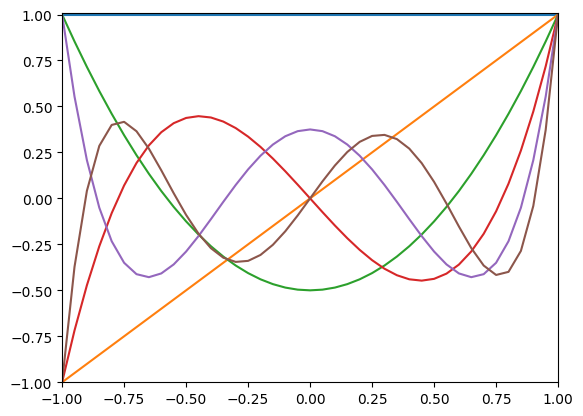

In [ ]:
from scipy.special import legendre
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

min = -1.0
max = 1.0
step = 0.05

for n in range(6):
    Pn = legendre(n)
    x = np.arange(min,max+step,step)
    y = Pn(x)
    plt.plot(x, y)

plt.xlim(-1.0,1.0)
plt.ylim(-1.0,1.01)
plt.show()


# **6. Funcions de Bessel**

Funcions de Bessel d'ordres petits

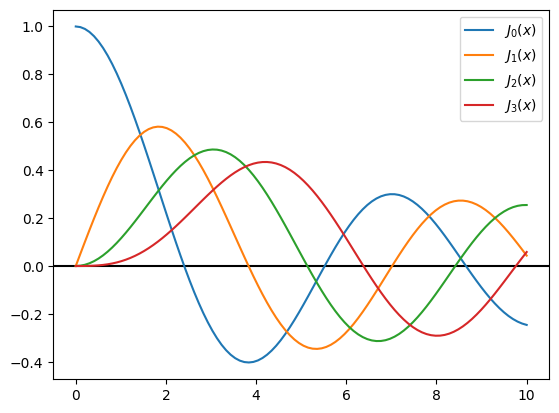

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn,jn_zeros
%matplotlib inline
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots()
plt.axhline(y=0.0, color='black', linestyle='-')
for n in range(4):
    ax.plot(x, jn(n, x), label=r"$J_%d(x)$"%n)
ax.legend()


Funcions de Bessel de segona espècie o funcions de Neumann

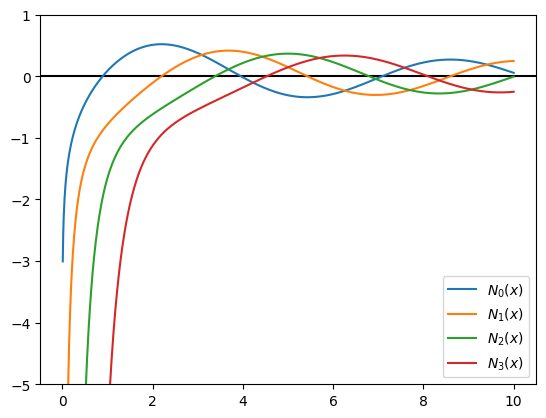

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn,jn_zeros,yn
%matplotlib inline
x = np.linspace(0, 10, 1000)

fig, ax = plt.subplots()
plt.ylim(bottom=-5)
plt.axhline(y=0,color='black',linestyle='-')
for n in range(4):
    ax.plot(x,yn(n, x),label=r"$N_%d(x)$"%n)
ax.legend(loc='lower right')
plt.show()

Zeros de les funcions de Bessel

In [ ]:
from scipy.special import jn,jn_zeros
n = 0 # ordre
m = 10 # nombre d'arrels a calcular
jn_zeros(0, m)


array([ 2.40482556,  5.52007811,  8.65372791, 11.79153444, 14.93091771,
       18.07106397, 21.21163663, 24.35247153, 27.49347913, 30.63460647])

Combinacions lineals de la funció de Bessel d'ordre zero i la seva derivada

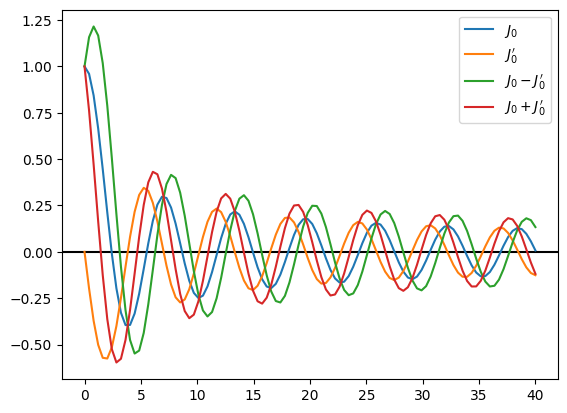

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn,jn_zeros
%matplotlib inline
x = np.linspace(0, 40, 100)

fig, ax = plt.subplots()
plt.axhline(y=0.0, color='black', linestyle='-')
ax.plot(x, jn(0, x), label=r"$J_0$")
ax.plot(x, -jn(1, x), label=r"$J_0'$")
ax.plot(x, jn(0, x)+jn(1, x), label=r"$J_0-J_0'$")
ax.plot(x, jn(0, x)-jn(1, x), label=r"$J_0+J_0'$")
ax.legend();


Funció $\Gamma$ d'Euler

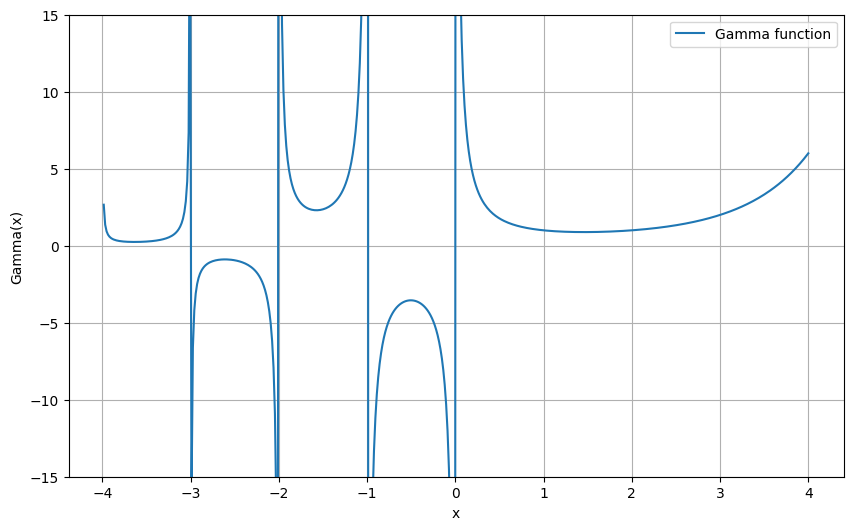

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

x_values = np.linspace(-4, 4, 500)
y_values = gamma(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Gamma function')
plt.xlabel('x')
plt.ylabel('Gamma(x)')
plt.grid(True)
plt.ylim(-15, 15)  # Limit y-axis values between -15 and 15

plt.legend()
plt.show()
